In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# import the data
customers = pd.read_csv("./Dataset/CUSTOMERS.csv")
geo_loc = pd.read_csv("./Dataset/GEO_LOCATION.csv")
order_items = pd.read_csv("./Dataset/ORDER_ITEMS.csv")
order_payments = pd.read_csv("./Dataset/ORDER_PAYMENTS.csv")
order_review_ratings = pd.read_csv("./Dataset/ORDER_REVIEW_RATINGS.csv")
orders = pd.read_csv("./Dataset/ORDERS.csv")
products = pd.read_csv("./Dataset/PRODUCTS.csv")
sellers = pd.read_csv("./Dataset/SELLERS.csv")

In [6]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [8]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [9]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


## Perforn Detialed explanatory Analysis

### Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [11]:
# Total Revenue
print("Total Revenue = ", round(order_items.price.sum(), 2))

# Total quantity
print("Total Quantity =", order_items.shape[0])

# Total products
print("Total Products =", products.product_id.nunique())

# Total categories
print("Total Categories =", products.product_category_name.nunique())

# Total sellers
print("Total Sellers =", sellers.seller_id.nunique())

# Total locations
print("Total Locations = ", geo_loc.geolocation_zip_code_prefix.nunique())

# Total payments methods
print("Total Payments methods =", order_payments.payment_type.nunique())


Total Revenue =  13591643.7
Total Quantity = 112650
Total Products = 32951
Total Categories = 71
Total Sellers = 3095
Total Locations =  19015
Total Payments methods = 5


# Understanding how many new customers acquired every month 

In [12]:
# changing the data type to time
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp, format = "%m/%d/%Y %H:%M")

In [13]:
orders['Year_month'] = orders.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x, format="%Y-%m"))

In [14]:
#merging customers and orders data
cust_orders = pd.merge(customers, orders, how= "left", on="customer_id")

In [15]:
cust_month = cust_orders.loc[:, ['customer_unique_id', "Year_month"]]

In [16]:
cust_month.drop_duplicates(subset="customer_unique_id", inplace=True)

In [19]:
new_cust_monthly = cust_month.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly.head(2)

,customer_unique_id
Year_month,
2016-09,4
2016-10,315


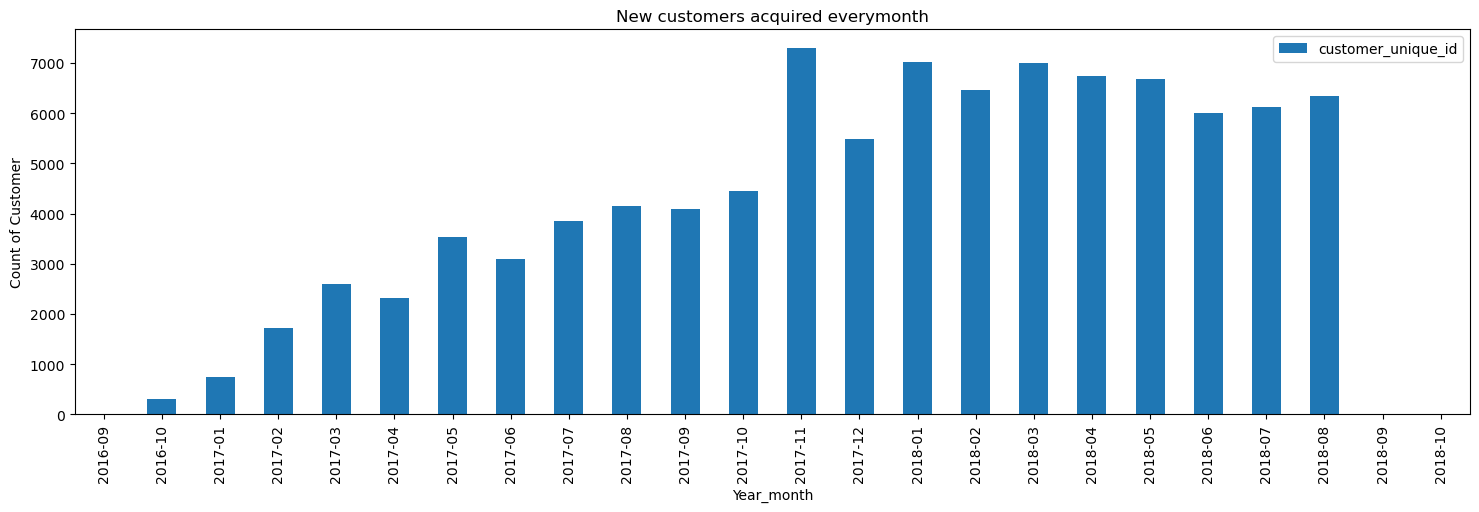

In [22]:
new_cust_monthly.plot(kind = "bar", figsize=(18, 5))
plt.ylabel("Count of Customer")
plt.title('New customers acquired everymonth')
plt.show()

# Understand the retention of customer on month on month basis

In [26]:
cust_monthly_cnt = cust_orders.groupby("Year_month")[['customer_unique_id']].count().reset_index()
cust_monthly_cnt.head(2)

,Year_month,customer_unique_id
0,2016-09,4
1,2016-10,324


In [24]:
cust_monthly_cnt.customer_unique_id.sum()

np.int64(99441)

In [37]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly.head(2)

,Year_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,4,4
1,2016-10,315,324


In [35]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id_y - retented_cust_monthly.customer_unique_id_x
retented_cust_monthly.head(2)

,Year_month,customer_unique_id_x,customer_unique_id_y,retented_cust
0,2016-09,4,4,0
1,2016-10,315,324,9


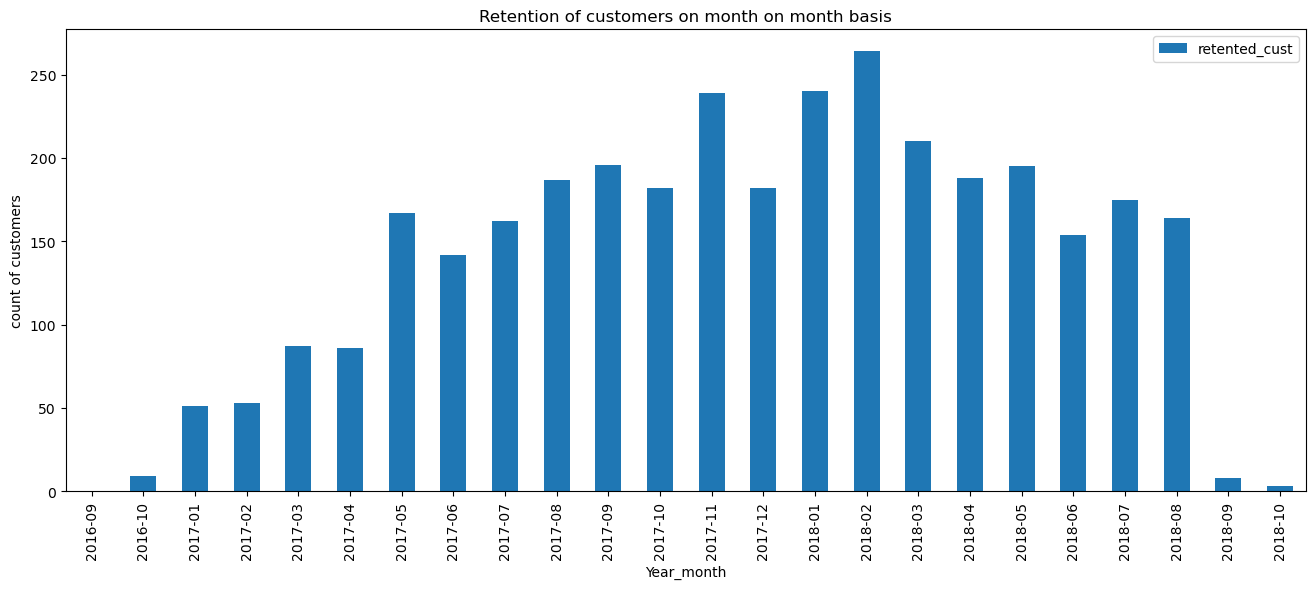

In [36]:
retented_cust_monthly.plot(kind= 'bar', x = 'Year_month' , y = 'retented_cust' , figsize = (16,6))
plt.ylabel('count of customers')
plt.title('Retention of customers on month on month basis')
plt.show()

# How the revenues from existing / new customers on month on month basis

In [38]:
order_items_month = pd.merge(order_items, orders, how="left", on="order_id")

In [39]:
order_items_month['net_price'] = order_items_month.price  + order_items_month.freight_value

In [41]:
rev_mouth = order_items_month.groupby("Year_month")[['net_price']].sum()
rev_mouth.head(2)

,net_price
Year_month,
2016-09,354.75
2016-10,56808.84


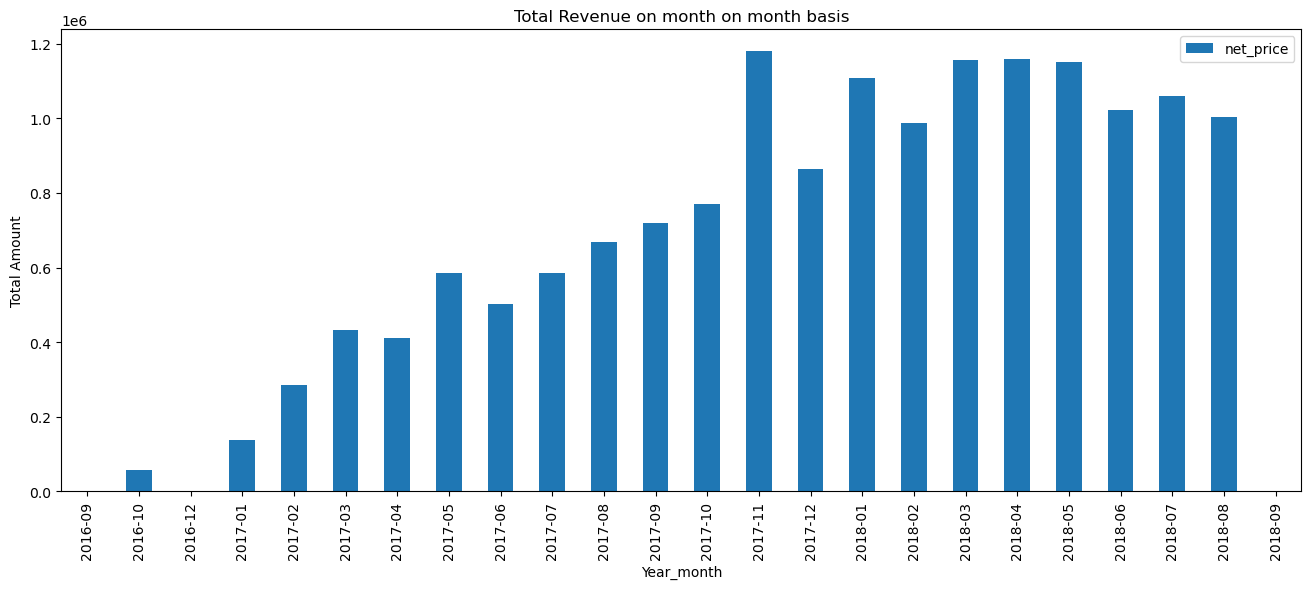

In [42]:
rev_mouth.plot(kind="bar", figsize=(16, 6))
plt.ylabel("Total Amount")
plt.title("Total Revenue on month on month basis")
plt.show()

#  understand the trends / seasonality of sales quantity by category, location, month, week, day, time, channel, payment methods etc..

In [43]:
order_items_prod = pd.merge(order_items_month, products, how="left", on="product_id")
order_items_prod['month'] = order_items_prod.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x, format="%b"))
order_items_prod.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,net_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,...,72.19,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Sep
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,...,259.83,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Apr


In [47]:
# Seasonality of sales, qty by category
cat_qty_sales = order_items_prod.groupby('product_category_name').agg({'product_id': 'count', 'price': 'sum'}).reset_index().rename(columns={'product_id': 'quantity', 'price': 'sales'})
cat_qty_sales

,product_category_name,quantity,sales
0,Agro_Industry_And_Commerce,212,72530.47
1,Air_Conditioning,297,55024.96
2,Art,209,24202.64
3,Arts_And_Craftmanship,24,1814.01
4,Audio,364,50688.50
...,...,...,...
66,Stationery,2517,230943.23
67,Tablets_Printing_Image,83,7528.41
68,Telephony,4545,323667.53
69,Toys,4117,483946.60


In [48]:
# seasonality pf sales, quantity by month
month_qty_sales = order_items_prod.groupby("month").agg({'product_id': 'count', 'price': 'sum'}).reset_index().rename(columns={'product_id': 'qauntity', 'price':'sales'})
month_qty_sales

,month,qauntity,sales
0,Apr,10659,1356574.98
1,Aug,12158,1428658.01
2,Dec,6309,743925.07
3,Feb,9623,1091481.73
4,Jan,9163,1070343.23
5,Jul,11611,1393538.70
6,Jun,10661,1298162.91
7,Mar,11217,1357557.74
8,May,12061,1502588.82
9,Nov,8665,1010271.37


# popular product by seller state and category

In [49]:
prod_seller = order_items_prod.groupby(["seller_id", "product_id"]).agg({'product_id': 'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_seller = prod_seller.sort_values(by=['seller_id', 'count']).drop_duplicates(subset="seller_id", keep='last')
prod_seller

,seller_id,product_id,count
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
14,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
37,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
34388,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
34397,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
34402,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
34430,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6
